In [1]:
pwd

'C:\\Users\\GunjanPandya\\Downloads'

In [2]:
import pandas as pd
# Data Visualization
import matplotlib.pyplot as matplt
%matplotlib inline

In [3]:
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})

In [4]:
df_train = pd.read_csv('train (3).csv', na_values=[' '])
df_test = pd.read_csv('test (2).csv', na_values=[' ']) 

In [5]:
#A look at data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe(include="all")

C:\Users\GunjanPandya\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brown, Mr. Thomas William Solomon",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
#Data for visualization
df_train["p_class"] = df_train.Pclass.map({1: "First", 2: "Second", 3: "Third"})
df_train["town"] = df_train.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
df_train["survi"] = df_train.Survived.map({0: "no", 1: "yes"})
df_train["family"] = (df_train.Parch + df_train.SibSp).astype(bool).map({False: "Travelling Alone", True: "Travelling With Family"})

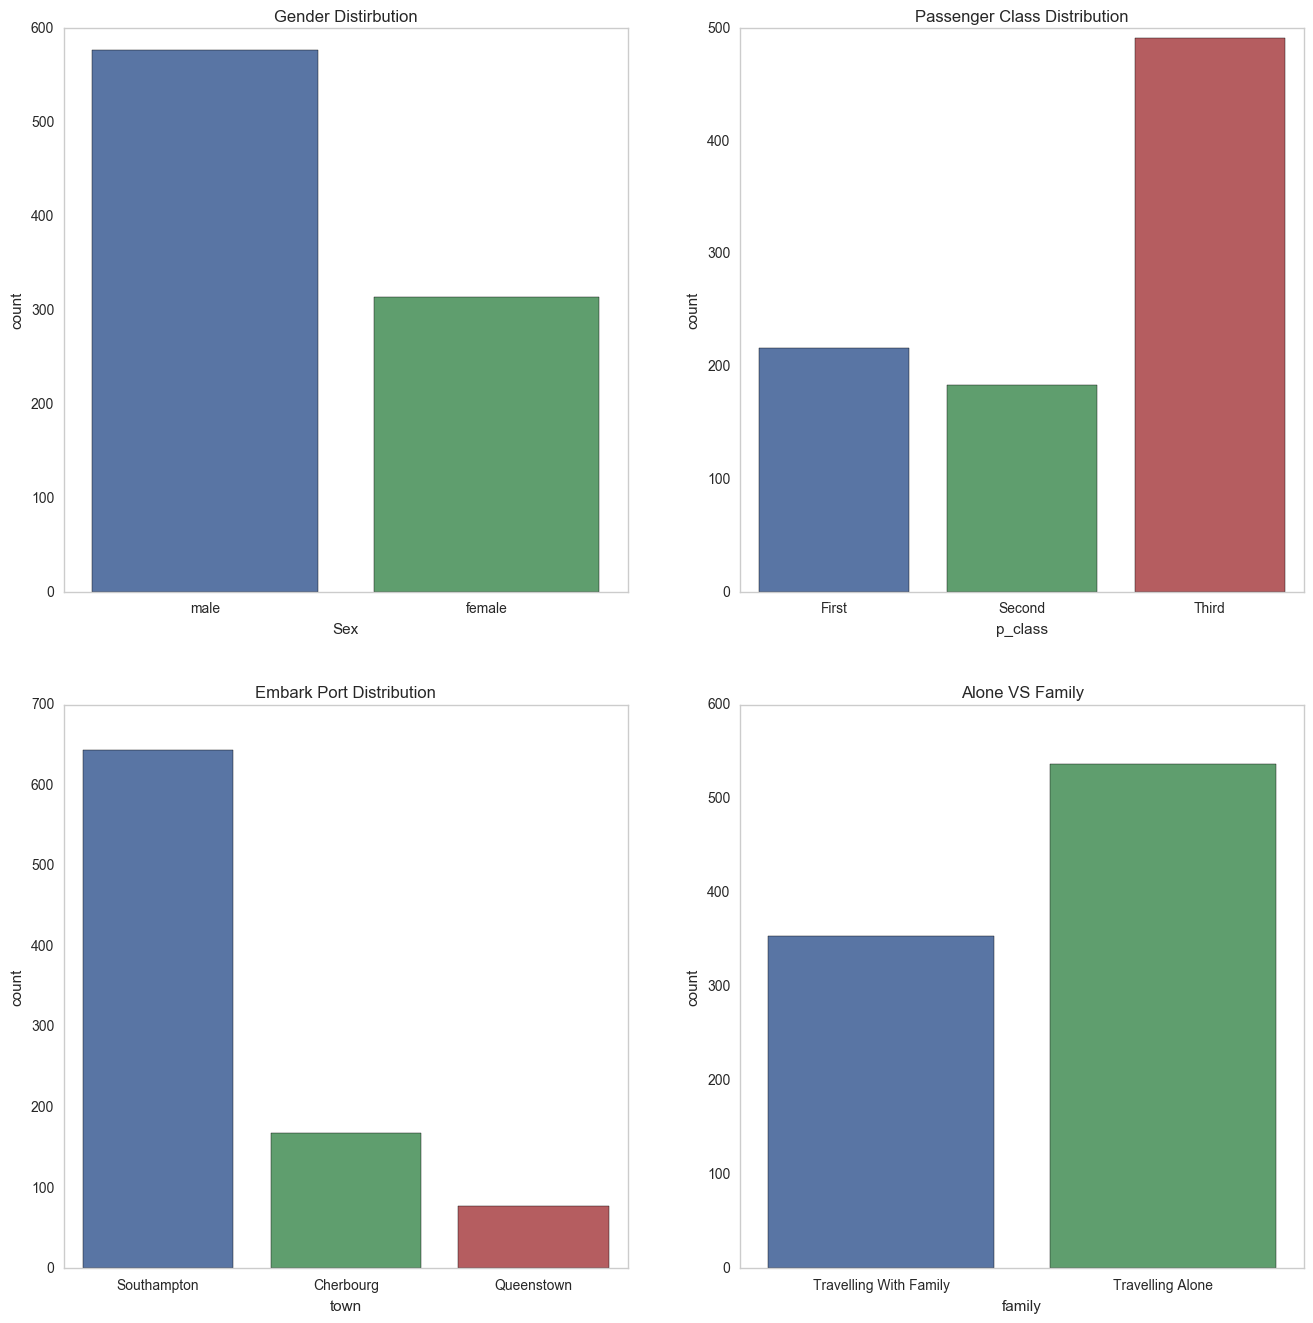

In [8]:
new_fig = matplt.figure(figsize=(16,16))
ax1 = new_fig.add_subplot(221)
sb.countplot('Sex', data=df_train)
ax1.set_title("Gender Distirbution")

ax2 = new_fig.add_subplot(222)
sb.countplot('p_class', data=df_train, order=["First", "Second", "Third"])
ax2.set_title("Passenger Class Distribution")

ax3 = new_fig.add_subplot(223)
sb.countplot('town', data=df_train)
ax3.set_title("Embark Port Distribution")

ax4 = new_fig.add_subplot(224)
sb.countplot('family', data=df_train)
ax4.set_title("Alone VS Family")

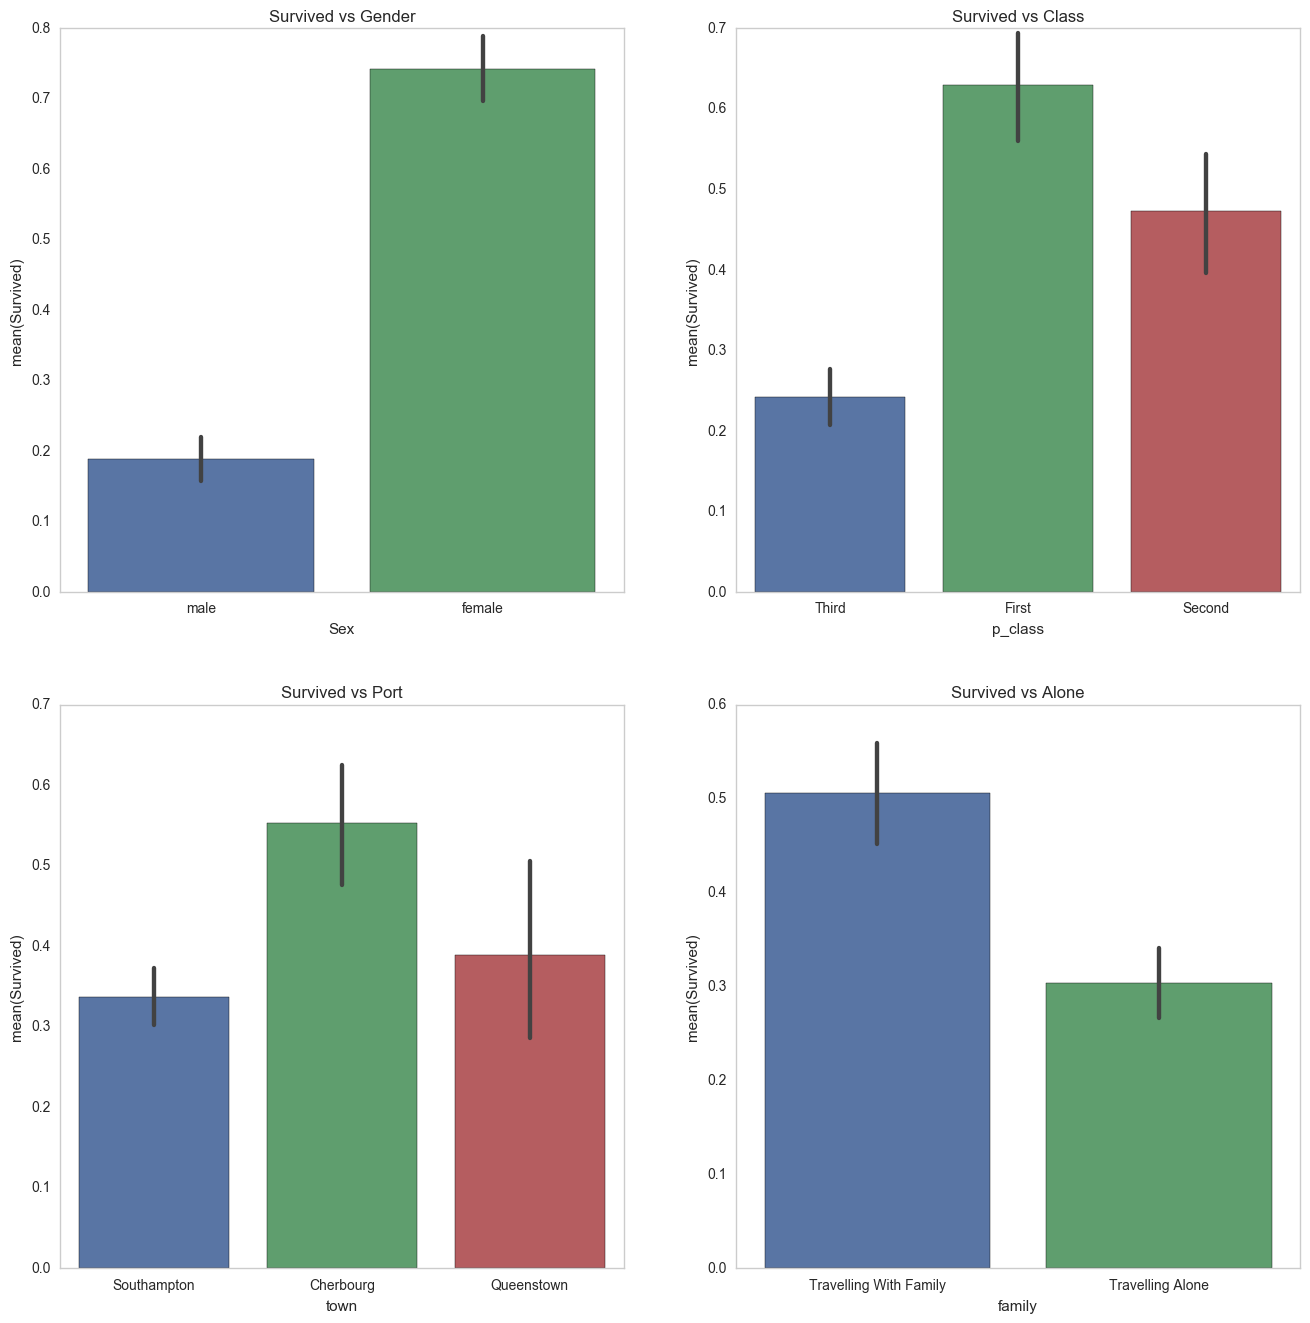

In [9]:
#Survived by variables
new_fig = matplt.figure(figsize=(16,16))
ax1 = new_fig.add_subplot(221)
sb.barplot(x="Sex", y="Survived", data=df_train)
ax1.set_title("Survived vs Gender")

ax2 = new_fig.add_subplot(222)
sb.barplot(x="p_class", y="Survived", data=df_train)#, order=["First", "Second", "Third"])
ax2.set_title("Survived vs Class")

ax3 = new_fig.add_subplot(223)
sb.barplot(x="town", y="Survived", data=df_train)
ax3.set_title("Survived vs Port")

ax4 = new_fig.add_subplot(224)
sb.barplot(x="family", y="Survived", data=df_train)
ax4.set_title("Survived vs Alone")

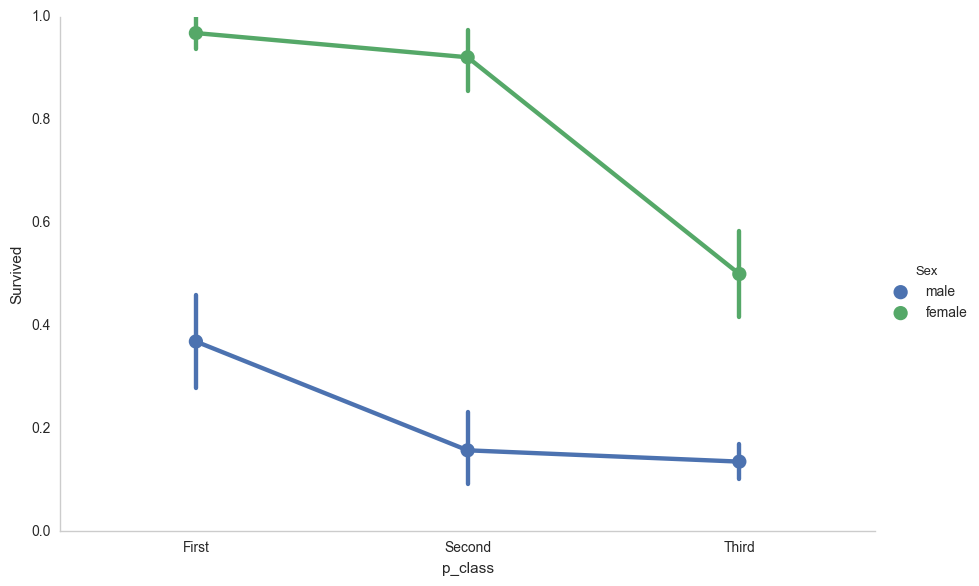

In [10]:
#How did class and gender interacted to impact the survival rate?
sb.factorplot("p_class", "Survived", data=df_train, hue="Sex", size=6, aspect=1.5, 
               order=["First", "Second", "Third"]).set(ylim=(0, 1))

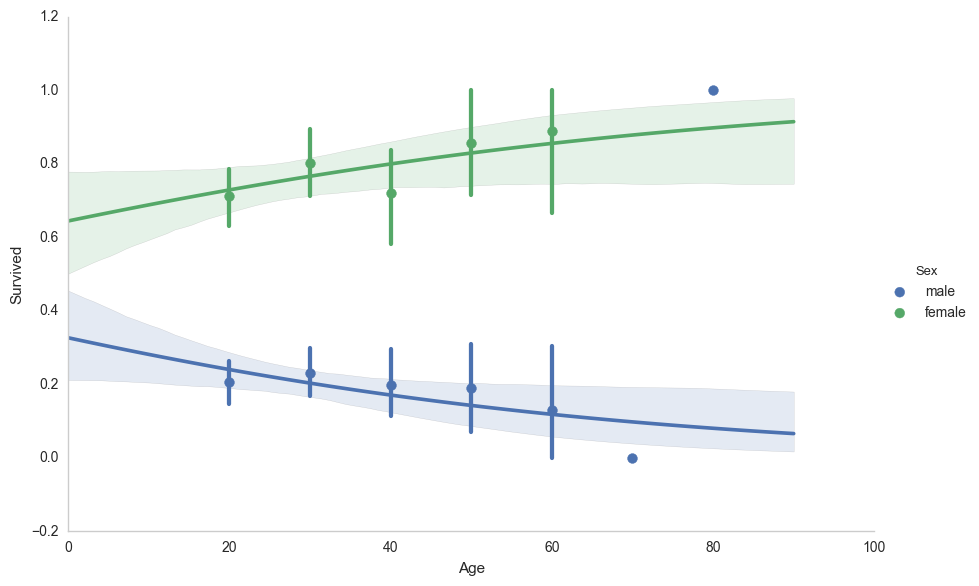

In [12]:
#How did age and gender interacted to impact the survival rate?
age_bins = age_bins = [20, 30, 40, 50, 60, 70, 80]
sb.lmplot("Age", "Survived", df_train, hue="Sex", size=6, aspect=1.5, 
           x_bins=age_bins, logistic=True).set(xlim=(0, 100));

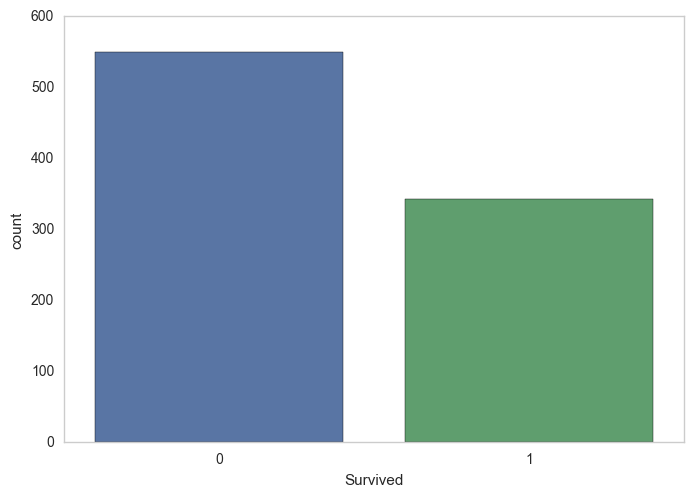

In [15]:
#Looking at Target Class Distirbution
sb.countplot('Survived', data=df_train)
ax3.set_title("Survived Distribution")